In [57]:
import pandas as pd
df = pd.read_csv('/content/dataset.csv')

Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [58]:
print("\nMissing Value Count:")
print(df.isnull().sum())



Missing Value Count:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [59]:
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = ['species', 'island', 'sex']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [60]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [61]:
gentoo= df['species'] == 'Gentoo'
gentoo_avg_mass=df[gentoo]['body_mass_g'].mean()
print(gentoo_avg_mass)

5125.0


Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)


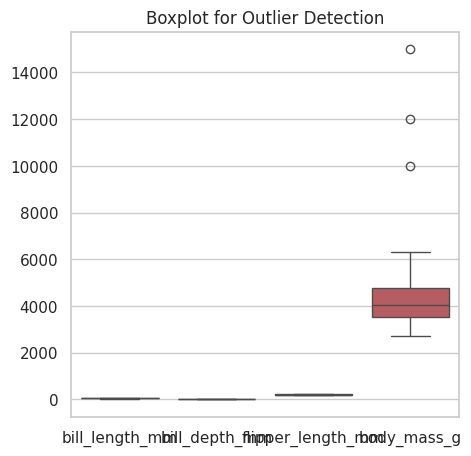

Outliers in bill_length_mm:
Empty DataFrame
Columns: [bill_length_mm]
Index: []
Outliers in bill_depth_mm:
Empty DataFrame
Columns: [bill_depth_mm]
Index: []
Outliers in flipper_length_mm:
Empty DataFrame
Columns: [flipper_length_mm]
Index: []
Outliers in body_mass_g:
     body_mass_g
73       15000.0
206      12000.0
324      10000.0


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

def detect_outliers(df, numeric_cols):
    outliers = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

outliers = detect_outliers(df, numeric_cols)

plt.figure(figsize=(5,5))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot for Outlier Detection')
plt.show()

for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_data[[col]])


Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

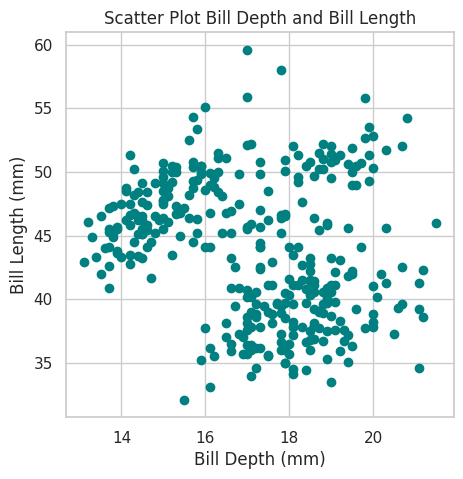

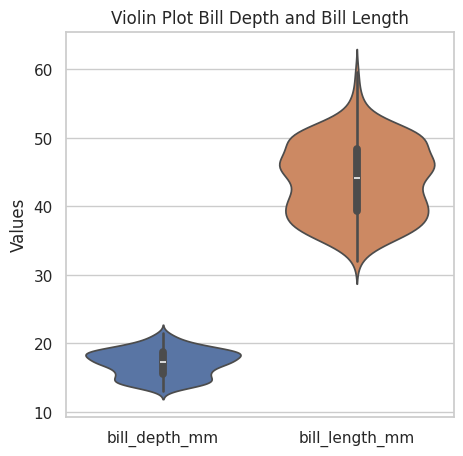

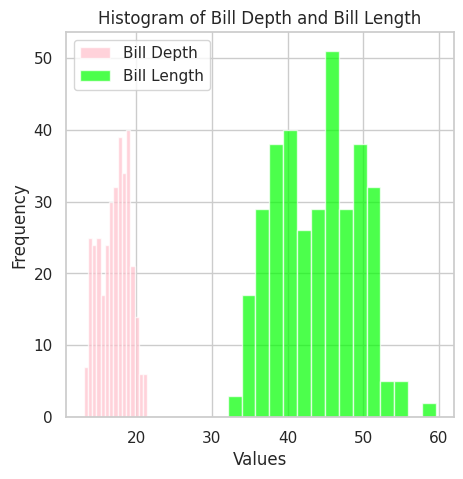

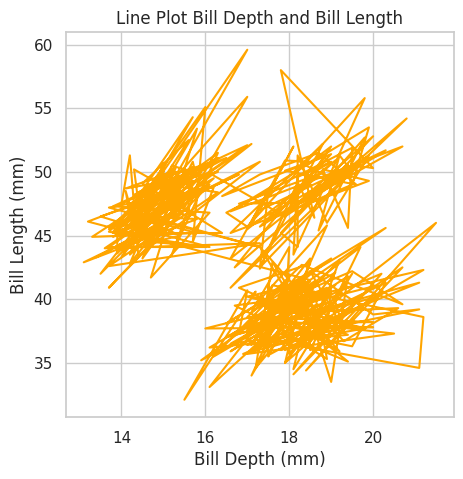

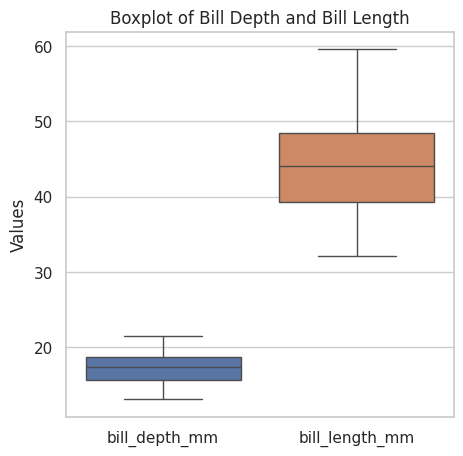

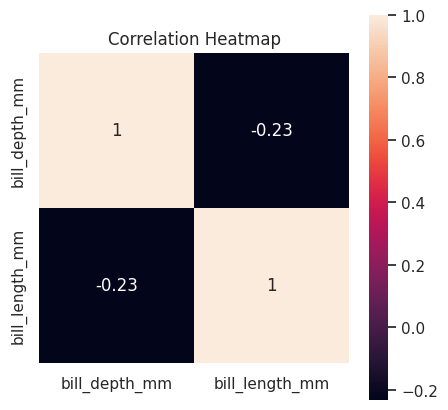

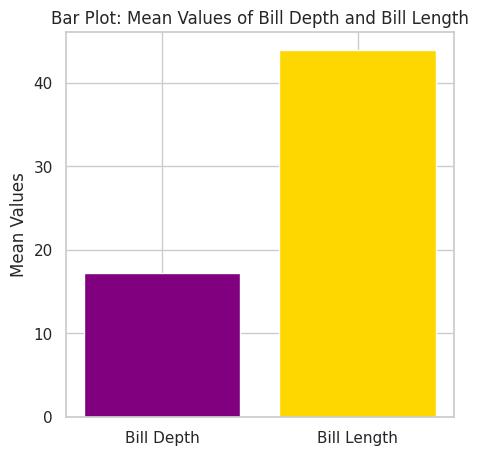

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(5,5))
plt.scatter(df['bill_depth_mm'], df['bill_length_mm'], color='teal')
plt.title('Scatter Plot Bill Depth and Bill Length')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Bill Length (mm)')
plt.show()

# Violin plot
plt.figure(figsize=(5,5))
sns.violinplot(data=df[['bill_depth_mm', 'bill_length_mm']])
plt.title('Violin Plot Bill Depth and Bill Length')
plt.ylabel('Values')
plt.show()

# Histogram
plt.figure(figsize=(5,5))
plt.hist(df['bill_depth_mm'], bins=15, color='pink', alpha=0.7, label='Bill Depth')
plt.hist(df['bill_length_mm'], bins=15, color='lime', alpha=0.7, label='Bill Length')
plt.title('Histogram of Bill Depth and Bill Length')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Line plot
plt.figure(figsize=(5,5))
plt.plot(df['bill_depth_mm'], df['bill_length_mm'], color='orange')
plt.title('Line Plot Bill Depth and Bill Length')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Bill Length (mm)')
plt.show()

# Box plot
plt.figure(figsize=(5,5))
sns.boxplot(data=df[['bill_depth_mm', 'bill_length_mm']])
plt.title('Boxplot of Bill Depth and Bill Length')
plt.ylabel('Values')
plt.show()

# Heatmap
plt.figure(figsize=(5,5))
corr_matrix = df[['bill_depth_mm','bill_length_mm']].corr()
sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

# Bar plot (mean values)
plt.figure(figsize=(5,5))
categories = ['Bill Depth', 'Bill Length']
mean_values = [df['bill_depth_mm'].mean(), df['bill_length_mm'].mean()]
plt.bar(categories, mean_values, color=['purple', 'gold'])
plt.title('Bar Plot: Mean Values of Bill Depth and Bill Length')
plt.ylabel('Mean Values')
plt.show()


Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [64]:

max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

print(longest_flippers)


     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


Q8: Perform z-score normalization on this dataset. (code)

In [65]:
from sklearn.preprocessing import StandardScaler

continuous_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['species', 'island', 'sex']

scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       -0.883054       0.787289          -1.420541    -0.468990   
1       -0.809180       0.126114          -1.063485    -0.424125   
2       -0.661432       0.431272          -0.420786    -0.917634   
3        0.040373       0.075255          -0.277964    -0.199803   
4       -1.326299       1.092447          -0.563608    -0.738176   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  \
0              False           False         False              True   
1              False           False         False              True   
2              False           False         False              True   
3              False           False         False              True   
4              False           False         False              True   

   sex_male  sex_unknown  
0      True        False  
1     False        False  
2     False        False  
3      True        False  
4     False        Fals